**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

In [1]:
# vibo: проверка текущей версии python и версий установленных библиотек
from platform import python_version
import pandas as pd
import numpy as np
print('python', python_version(), '\nnumpy', np.__version__, '\npandas', pd.__version__)

python 3.8.3 
numpy 1.18.5 
pandas 1.0.5


# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# vibo: посмотрим на первые 5 записей data frame
adver_data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [4]:
# vibo: размер data frame
adver_data.shape

(200, 4)

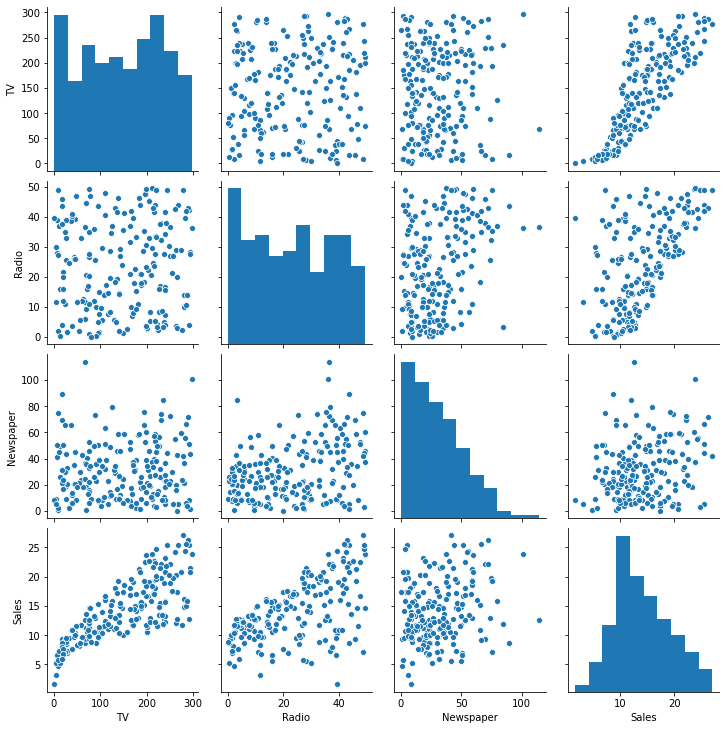

In [5]:
# vibo: для оценки статистической зависимости в данных построим парные графики
# vibo: на диагонали показаны распределения соответствующего признака
import seaborn as sns;
import matplotlib.pyplot as plt

sns.pairplot(adver_data)
plt.show()

In [6]:
# vibo: из графика видно, что меньше всего на продажи виляет реклама в газетах, потом на радио.
# больше всего на продажи влияет реклама на TV

In [7]:
# vibo: рассмотрим корреляцию данных, по умолчанию это корреляция пирсона, которая показывает 
# существование линейной зависимости между величинами.
adver_data.corr(method='pearson')

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [8]:
# vibo: корреляция рекламы на TV и продажи 78%, радио 57%, газеты 22%

In [9]:
# vibo: основные статистические характеристики по каждому признаку (все числовые)
adver_data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [10]:
# vibo: создаем массив X с матрицей признаков
X = adver_data[['TV', 'Radio', 'Newspaper']].values
# vibo: создаем массив Y с вектором целевой переменной (целевого признака)
y = adver_data['Sales'].values

In [11]:
# # vibo: МОЯ ОШИБКА!!! прочитал как матрицу
# y = adver_data[['Sales']].values
# y.shape

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [12]:
# vibo: вычисляем среднее и стандартное отклонение для каждого столбца матрицы X, 
# полученные значения соответствуют данным, которые мы получили выше методом describe()
means, stds = X.mean(axis=0), X.std(axis=0)
means, stds

(array([147.0425,  23.264 ,  30.554 ]),
 array([85.63933176, 14.80964564, 21.72410606]))

In [13]:
# vibo: масшабируем (нормируем) матрицу Х для уменьшения разброса данных
X = (X - means)/stds

In [14]:
# vibo: проверим результат с использованим пакета sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(adver_data), columns=['TV', 'Radio', 'Newspaper', 'Sales']).head()

TV     Radio  Newspaper     Sales
0  0.969852  0.981522   1.778945  1.552053
1 -1.197376  1.082808   0.669579 -0.696046
2 -1.516155  1.528463   1.783549 -0.907406
3  0.052050  1.217855   1.286405  0.860330
4  0.394182 -0.841614   1.281802 -0.215683

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [15]:
# vibo: добавляем столбец из единиц, работает без reshape(?)
import numpy as np
#X = np.hstack((X, np.ones((200, 1))))

X = np.hstack((np.ones((200, 1)), X))

#X = np.hstack((np.ones((X.shape[0], 1)), X))

print(X)

[[ 1.00000000e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [ 1.00000000e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [ 1.00000000e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 1.00000000e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 1.00000000e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [ 1.00000000e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [ 1.00000000e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [ 1.00000000e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [ 1.00000000e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 1.00000000e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [ 1.00000000e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 1.00000000e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [ 1.00000000e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [ 1.00000000e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 1.00000000e+00  6.66253447e-01  6.50657027e-01  7.11007392e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [16]:
# vibo: функция среднеквадратичной ошибки 
def mserror(y, y_pred):
     return ((y_pred - y) ** 2).sum()/len(y)

# vibo: проверка
print(mserror(np.array([1, 1, 1]), np.array([0.9, 0.9, 0.9])))

0.009999999999999995


In [17]:
# vibo: готовая функция среднеквадратичной ошибки
from sklearn.metrics import mean_squared_error

# vibo: проверка
print(mean_squared_error(np.array([1, 1, 1]), np.array([0.9, 0.9, 0.9])))

0.009999999999999995


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [18]:
# vibo: медианное значение Sales по исходной выборке можно посмотреть в таблице выше
# с основными статистическими характеристиками, медианное значение = 50 персентиль, соответсвенно 12.9
Y_pred_1 = 12.9

In [19]:
# vibo: это же значение можно получить
Y_pred_1 = adver_data.Sales.quantile(q=0.50)
Y_pred_1

12.9

In [20]:
# vibo: или так
Y_pred_1 = np.median(y)
Y_pred_1

12.9

In [21]:
# vibo: расчет среднеквадратичной ошибки прогноза значения  Sales
answer1 = mserror(y, Y_pred_1)
print(round(answer1, 3))

28.346


In [22]:
# vibo: запишем полученное значение в файл для загрузки в систему
with open ('1.txt', 'w') as file_obj:
    file_obj.write(str(round(answer1, 3)))

In [23]:
# vibo: проверим, что файл записан корректно
!cat '1.txt'

28.346

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [24]:
# vibo: функция определяет вектор весов согласно нормальному уравлению линейной регрессии
# перемножение матриц А и В -> np.dot(A, B); транспонирование -> .T;
# получение обратной матрицы A -> np.linalg.inv(A); домножение на вектор -> .dot(y)
def normal_equation(X, y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)), X.T).dot(y)

In [25]:
# vibo: получен следующий результат для коэффициентов модели найденных по нормальному уравнению:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [26]:
# vibo: при x1, x2, x3 равных нулю в уравнении остается один свободный член wo
answer2 = norm_eq_weights[0]
print(answer2)

14.0225


In [27]:
# vibo: запишем полученное значение в файл для загрузки в систему
with open ('2.txt', 'w') as file_obj:
    file_obj.write(str(round(float(answer2), 3)))

In [28]:
# vibo: проверим, что файл записан корректно
!cat '2.txt'

14.023

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [29]:
# vibo: получим вектор прогнозов с весами линейной модели, полученными с помощью линейного уравнения
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [30]:
# vibo: за среднеквадратичну ошибку отвечает созданная выше функция mserror
# в качестве аргументов добавляем правильные ответы y и для прогнозируемых ответов
# используем только что созданную функцию linear_prediction, где X - наши параметры, 
# a norm_eq_weights - найденные коэффициенты линейной модели
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(round(answer3, 3))

2.784


In [31]:
# vibo: запишем полученное значение в файл для загрузки в систему
with open ('3.txt', 'w') as file_obj:
    file_obj.write(str(round(float(answer3), 3)))

In [32]:
# vibo: проверим, что файл записан корректно
!cat '3.txt'

2.784

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [33]:
train_ind=158
print(X[train_ind, :])

[ 1.         -1.58037782  0.92075127  0.67418194]


In [34]:
y[train_ind]

7.3

In [35]:
print(X[train_ind, 0])

1.0


In [36]:
# vibo: функция расчета шага стохастического градиентного спуска для линейной регрессии
# формулы приведены в начале ноутбука
# ВАЖНО! т.к. приклеил единичный столбец в начало (индексом 0), grag0 без домножения на X[train_ind, 0] он равен 1
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = 2 / len(y) * (linear_prediction(X[train_ind, :], w) - y[train_ind])
    grad1 = 2 / len(y) * (linear_prediction(X[train_ind, :], w) - y[train_ind]) * X[train_ind, 1]
    grad2 = 2 / len(y) * (linear_prediction(X[train_ind, :], w) - y[train_ind]) * X[train_ind, 2]
    grad3 = 2 / len(y) * (linear_prediction(X[train_ind, :], w) - y[train_ind]) * X[train_ind, 3]
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [37]:
random_ind = np.random.randint(X.shape[0])
print(random_ind)

139


In [38]:
weight_dist = np.inf
print(type(weight_dist))

<class 'float'>


In [39]:
# vibo: реализуем функцию стохастического градиентного спуска для линейной регрессии
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа (номер объекта, который будет менять веса), 
    # а для воспроизводимости этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
     
   
        # vibo: определеяем вектор весов c помощью написанной функции выше   
        new_w = stochastic_gradient_step(X, y, w, train_ind=random_ind, eta=0.01)
        weight_dist = np.linalg.norm(new_w - w)
        w = new_w
        
        # vibo: находим среднеквадратическое оклонение на данном шаге
        errors.append(mserror(y, linear_prediction(X, w)))
        iter_num += 1
    
    
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [40]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]), max_iter=1e5)

CPU times: user 6.74 s, sys: 6.24 ms, total: 6.74 s
Wall time: 6.76 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

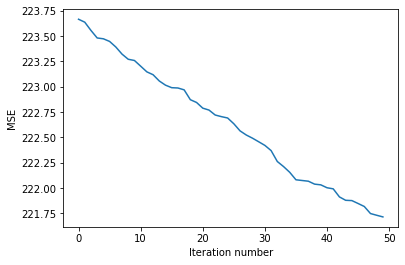

In [41]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

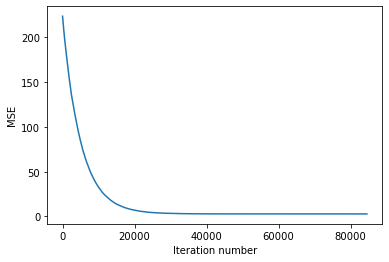

In [42]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [43]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [44]:
stoch_errors_by_iter[-1]

2.7844125884067035

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [45]:
answer4 = stoch_errors_by_iter[-1]
print(round(answer4, 3))

2.784


In [46]:
# vibo: запишем полученное значение в файл для загрузки в систему
with open ('4.txt', 'w') as file_obj:
    file_obj.write(str(round(float(answer4), 3)))

In [47]:
# vibo: проверим, что файл записан корректно
!cat '4.txt'

2.784